In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from gwpy.types import Series
import lalsimulation.gwsignal.core.waveform as wfm

from gw_signal_tools.fisher import FisherMatrix, fisher_matrix
from gw_signal_tools.fisher.distances import distance, linearized_distance
from gw_signal_tools.fisher import latexparams

/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


The pyseobnr package has failed to load, you will not be able to employ SEOBNRv5 approximants.


/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/lalsimulation/gwsignal/core/waveform.py:226: UserWarning: This code is currently UNREVIEWED, use with caution!
  warnings.warn("This code is currently UNREVIEWED, use with caution!")


In [2]:
from gw_signal_tools import PLOT_STYLE_SHEET
plt.style.use(PLOT_STYLE_SHEET)

In [3]:
f_min = 20.*u.Hz  # Cutoff frequency
f_max = 1024. * u.Hz  # Cutoff from PSD
delta_f = 2**-6 * u.Hz
f_ref = f_min  # Frequency where we specify spins


approximant = 'IMRPhenomXPHM'
wf_gen = FisherMatrix.get_wf_generator(approximant)


wf_params = {
    'total_mass': 100.*u.Msun,
    # 'sym_mass_ratio': 0.05*u.dimensionless_unscaled,
    # 'sym_mass_ratio': 0.15*u.dimensionless_unscaled,
    'mass_ratio': 0.5*u.dimensionless_unscaled,
    'f22_start': f_min,
    'f_max': f_max,
    'f22_ref': f_ref,
    'phi_ref': 0.*u.rad,
    'distance': 1.*u.Mpc,
    'inclination': 0.*u.rad,
    'eccentricity': 0.*u.dimensionless_unscaled,
    'longAscNodes': 0.*u.rad,
    'meanPerAno': 0.*u.rad,
    # 'spin1z': 0.42*u.dimensionless_unscaled,
    'condition': 0
    # 'condition' : 1  # Needs to be on for SEOB
}

/home/user/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/lalsimulation/gwsignal/core/waveform.py:226: UserWarning: This code is currently UNREVIEWED, use with caution!
  warnings.warn("This code is currently UNREVIEWED, use with caution!")


In [4]:
# param_to_vary = 'total_mass'
# center_val = 42.*u.solMass
# center_val = 60.*u.solMass
# center_val = 100.*u.solMass

param_to_vary = 'mass_ratio'
center_val = 0.5*u.dimensionless_unscaled

# param_to_vary = 'sym_mass_ratio'
# center_val = 0.15*u.dimensionless_unscaled

# param_to_vary = 'distance'
# center_val = 440.*u.Mpc

# param_to_vary = 'spin1z'
# center_val = 0.42*u.dimensionless_unscaled


param_range = u.Quantity([0.9*center_val, 1.1*center_val])
# param_range = u.Quantity([0.1, 0.2])
# param_range = u.Quantity([0.8*center_val, 1.2*center_val])

wf_params[param_to_vary] = center_val

## Non-optimized Distance

In [5]:
distance_non_opt = distance(
    param_to_vary,
    param_range,
    wf_params,
    # step_size=1e-3*center_val,
    # step_size=1e-2*center_val,
    step_size=5e-3*center_val,
    distance_kind='diff_norm',
    wf_generator=wf_gen
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

In [6]:
fisher_non_opt = FisherMatrix(wf_params, param_to_vary, wf_gen, return_info=False)

# approx_distance_non_opt = Series(
#     fisher_non_opt.fisher[0, 0]**(1/2) * np.abs(distance_non_opt.xindex - wf_params[param_to_vary]),
#     xindex=distance_non_opt.xindex
# )

approx_distance_non_opt = linearized_distance(
    param_to_vary,
    param_range,
    wf_params,
    # step_size=1e-3*center_val,
    # step_size=1e-2*center_val,
    step_size=5e-3*center_val,
    wf_generator=wf_gen
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

In [7]:
# param_range_2 = u.Quantity([0.14, 0.16])

# distance_non_opt2 = distance(
#     param_to_vary,
#     param_range_2,
#     wf_params,
#     step_size=1e-3*center_val,
#     distance_kind='mismatch_norm',
#     wf_generator=wf_gen
# )

Note: have to make much smaller step sizes here

-> does not work as intended

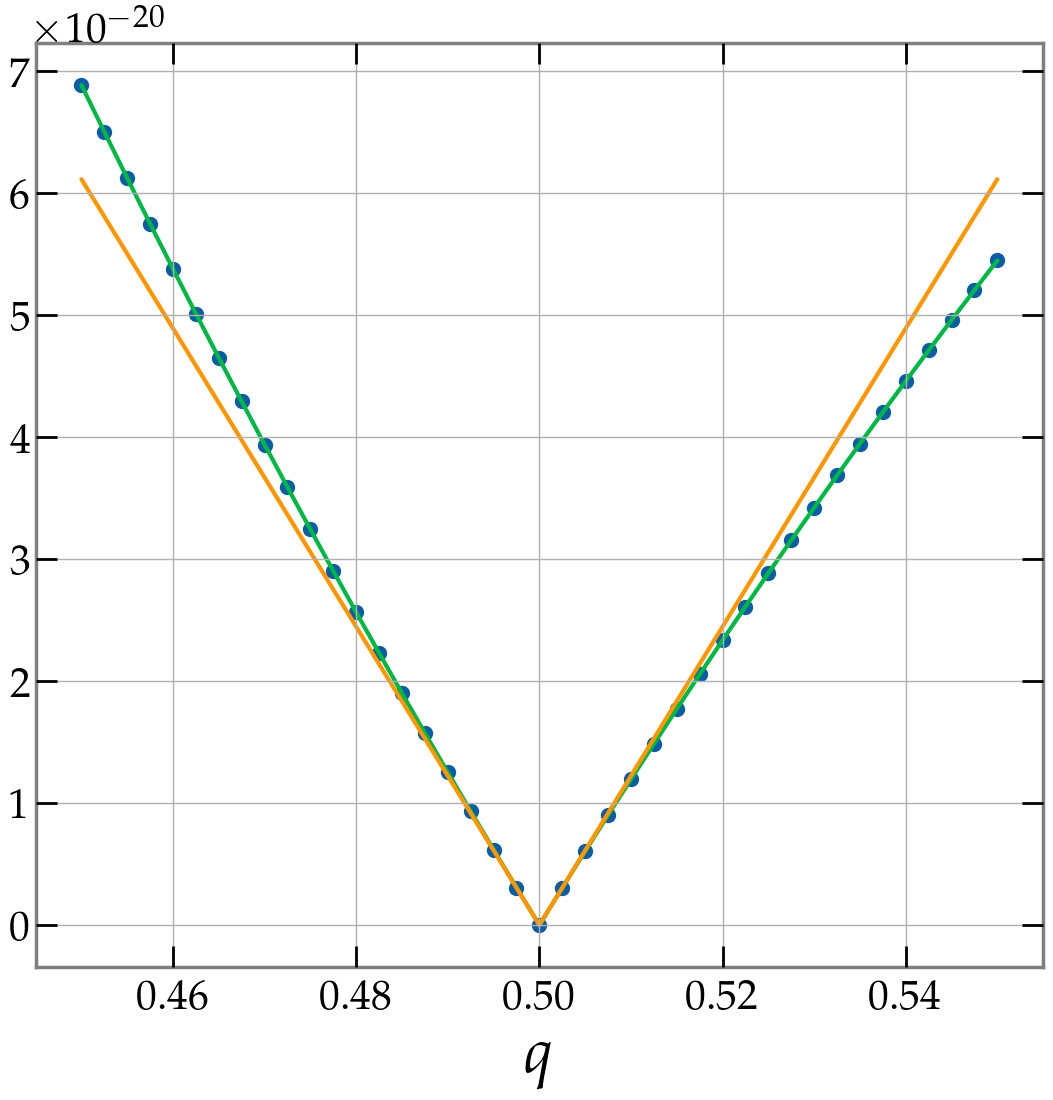

In [8]:
plt.plot(distance_non_opt, '.')
plt.plot(distance_non_opt, '-')

# plt.plot(1 - distance_non_opt2, '+')
# plt.plot(1 - distance_non_opt2, '-')

plt.plot(approx_distance_non_opt)

# plt.ylim(0, 5e-19)
# plt.ylim(0, 3e-19)

# plt.xlim([0.149, 0.151])
# plt.ylim([0.0, 1e-4])
# plt.ylim([0.0, 1e-6])

plt.xlabel(latexparams[param_to_vary] if param_to_vary in latexparams else param_to_vary)

plt.show()

## Optimized Distance

In [9]:
distance_opt = distance(
    param_to_vary,
    param_range,
    wf_params,
    # step_size=1e-3*center_val,
    # step_size=1e-2*center_val,
    step_size=5e-3*center_val,
    distance_kind='diff_norm',
    wf_generator=wf_gen,
    optimize_time_and_phase=True
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

In [10]:
fisher_opt1 = FisherMatrix(wf_params, [param_to_vary, 'time', 'phase'], wf_gen, optimize_time_and_phase=False, return_info=False)

fisher_projected = fisher_opt1.project_fisher(['time', 'phase'])

# approx_distance_opt1 = Series(
#     fisher_projected[0, 0]**(1/2) * np.abs(distance_opt.xindex - wf_params[param_to_vary]),
#     xindex=distance_opt.xindex
# )

approx_distance_opt1 = linearized_distance(
    # param_to_vary,
    [param_to_vary, 'time', 'phase'],
    param_range,
    wf_params,
    # step_size=1e-3*center_val,
    # step_size=1e-2*center_val,
    step_size=5e-3*center_val,
    wf_generator=wf_gen,
    params_to_project=['time', 'phase']
)


fisher_opt2 = FisherMatrix(wf_params, param_to_vary, wf_gen, optimize_time_and_phase=True, return_info=False)

# approx_distance_opt2 = Series(
#     fisher_opt2.fisher[0, 0]**(1/2) * np.abs(distance_opt.xindex - wf_params[param_to_vary]),
#     xindex=distance_opt.xindex
# )

approx_distance_opt2 = linearized_distance(
    param_to_vary,
    param_range,
    wf_params,
    # step_size=1e-3*center_val,
    # step_size=1e-2*center_val,
    step_size=5e-3*center_val,
    wf_generator=wf_gen,
    optimize_time_and_phase=True
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:490): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:851): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:669): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupTotalMass (LALSimInspiralWaveformParams.c:833): This code is

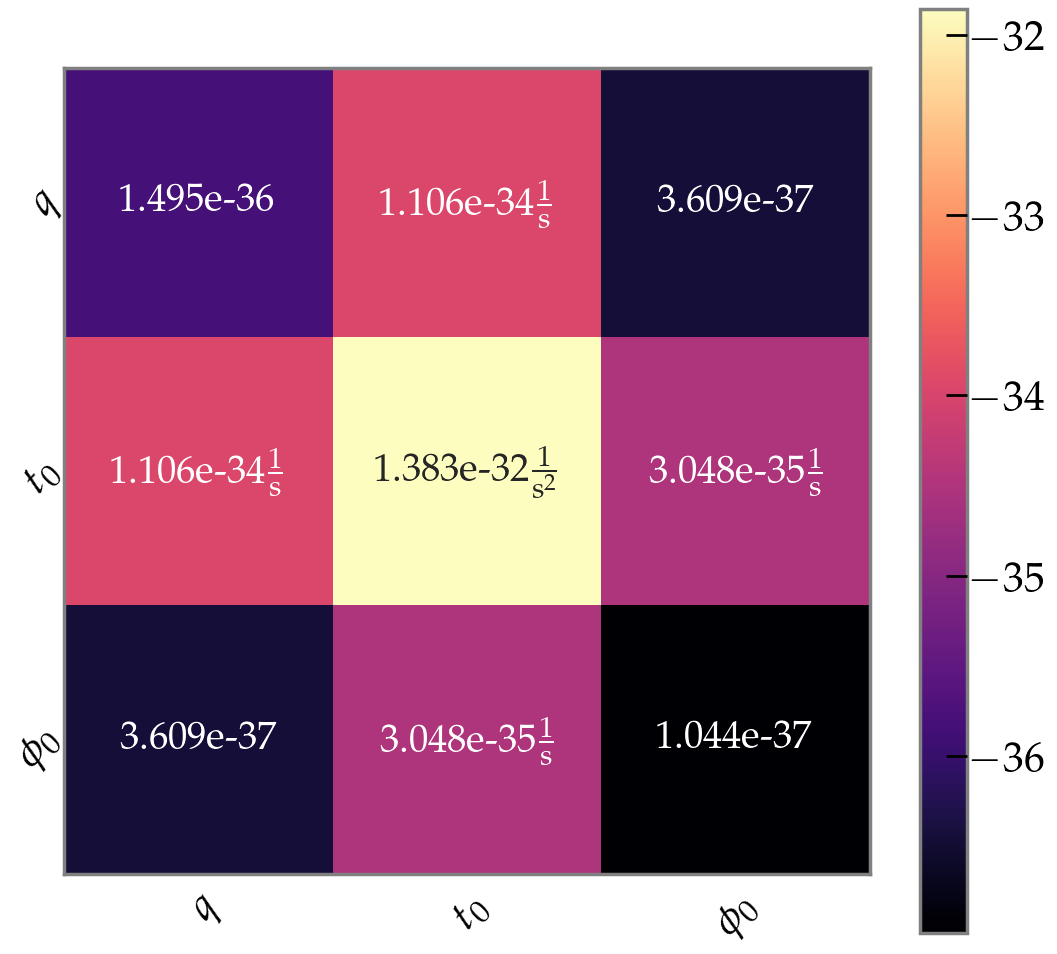

/home/user/Documents/master/gw-signal-tools/gw_signal_tools/matrix_with_units.py:685: RuntimeWarning: divide by zero encountered in log10
  mesh = ax.pcolormesh(np.log10(np.abs(self)), cmap='magma')


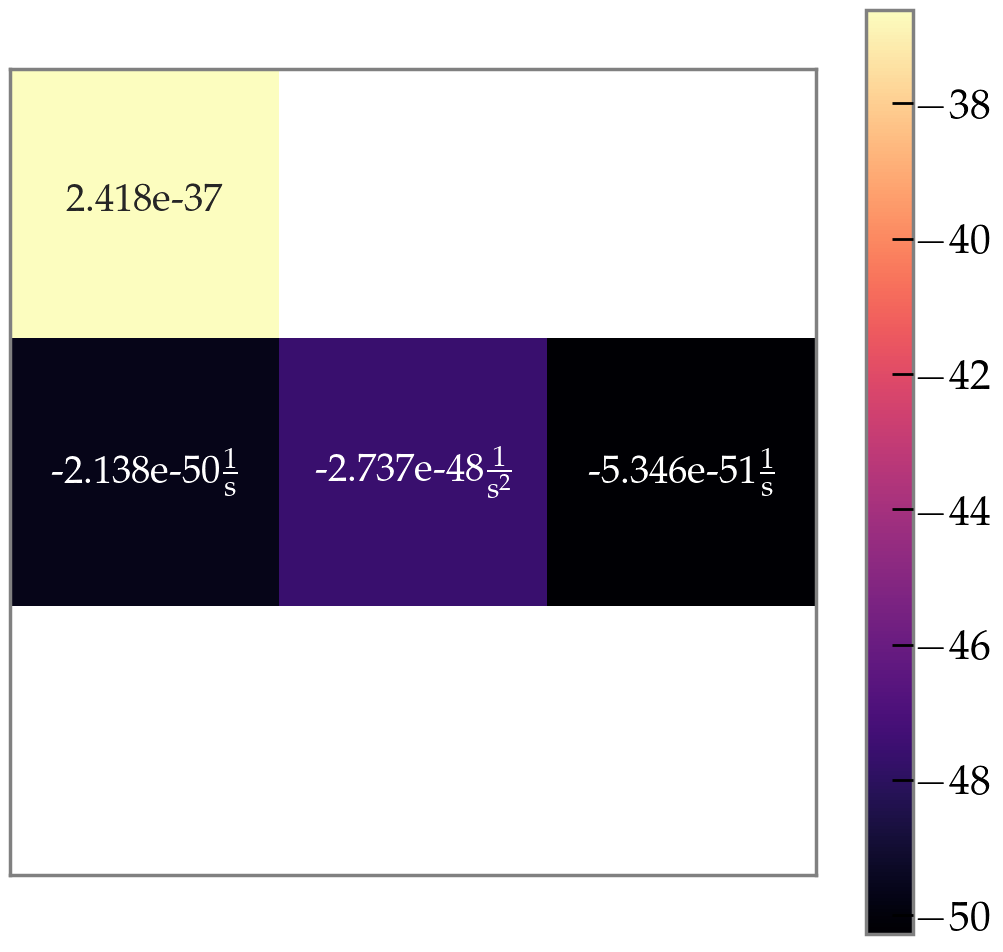

In [11]:
fisher_opt1.plot(only_fisher=True)
plt.show()

# fisher_opt2.plot(only_fisher=True)
# plt.show()

fisher_projected.plot()
plt.show()

In [12]:
print(fisher_projected)

array([[<Quantity 2.41762031e-37>, <Quantity 0. 1 / s>,
        <Quantity 0.>],
       [<Quantity -2.13821177e-50 1 / s>,
        <Quantity -2.73691106e-48 1 / s2>,
        <Quantity -5.34552942e-51 1 / s>],
       [<Quantity 0.>, <Quantity 0. 1 / s>, <Quantity 0.>]],
      dtype=object)


Clearly, projected Fisher has much smaller values, which will correspond to much smaller distances. This is not unexpected, there is no need for results to agree with Fisher calculated using optimized inner product. It should, however, agree with distance with optimization.

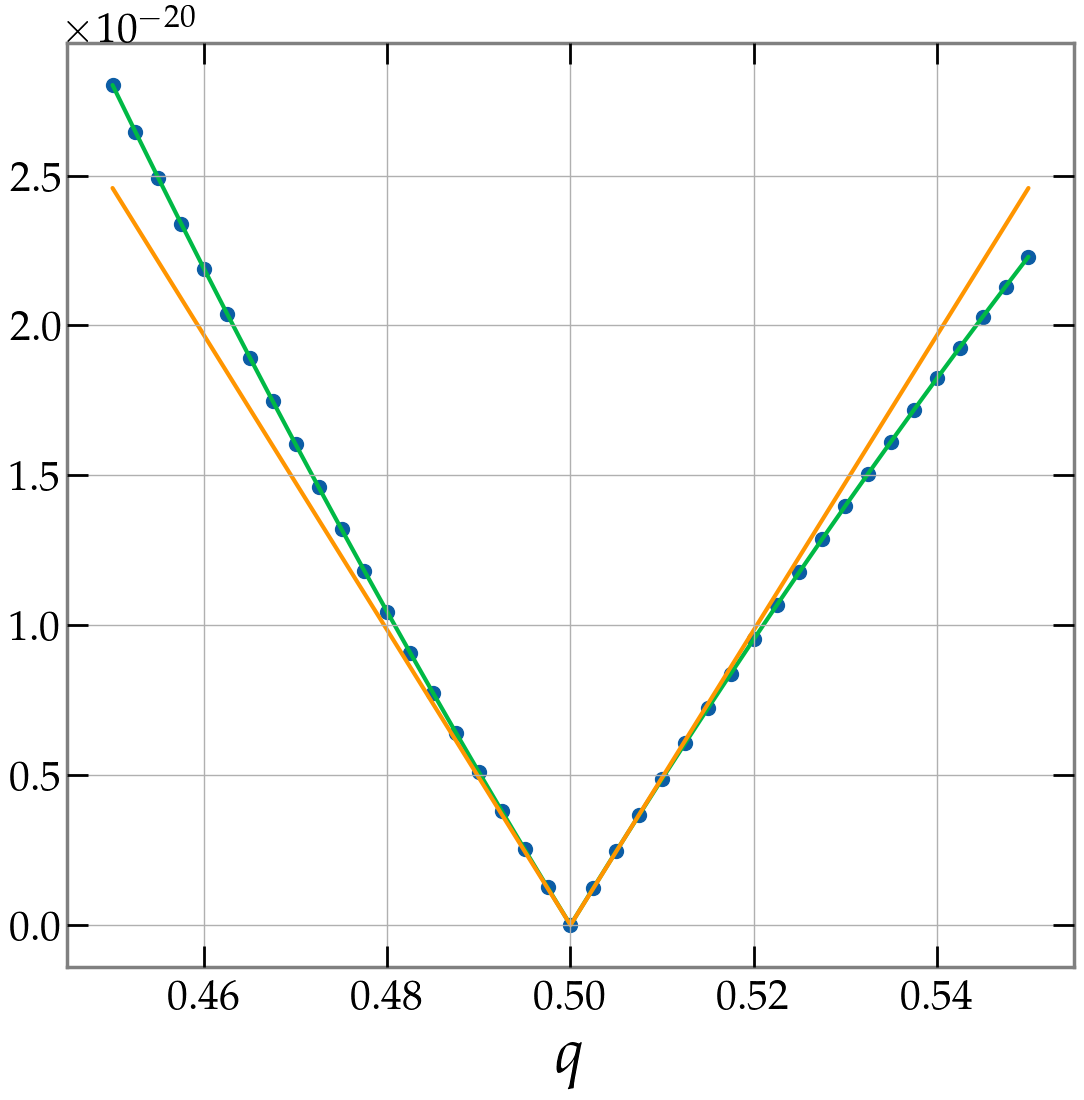

In [13]:
plt.plot(distance_opt, '.')
plt.plot(distance_opt, '-')

plt.plot(approx_distance_opt1)


# plt.xlim(0.41, 0.43)
# plt.ylim(0, 5e-19)
# plt.ylim(0, 3e-19)
# plt.ylim(0, 2e-20)

plt.xlabel(latexparams[param_to_vary] if param_to_vary in latexparams else param_to_vary)

plt.show()

## Summary

Pretty much everything works as expected, very good!

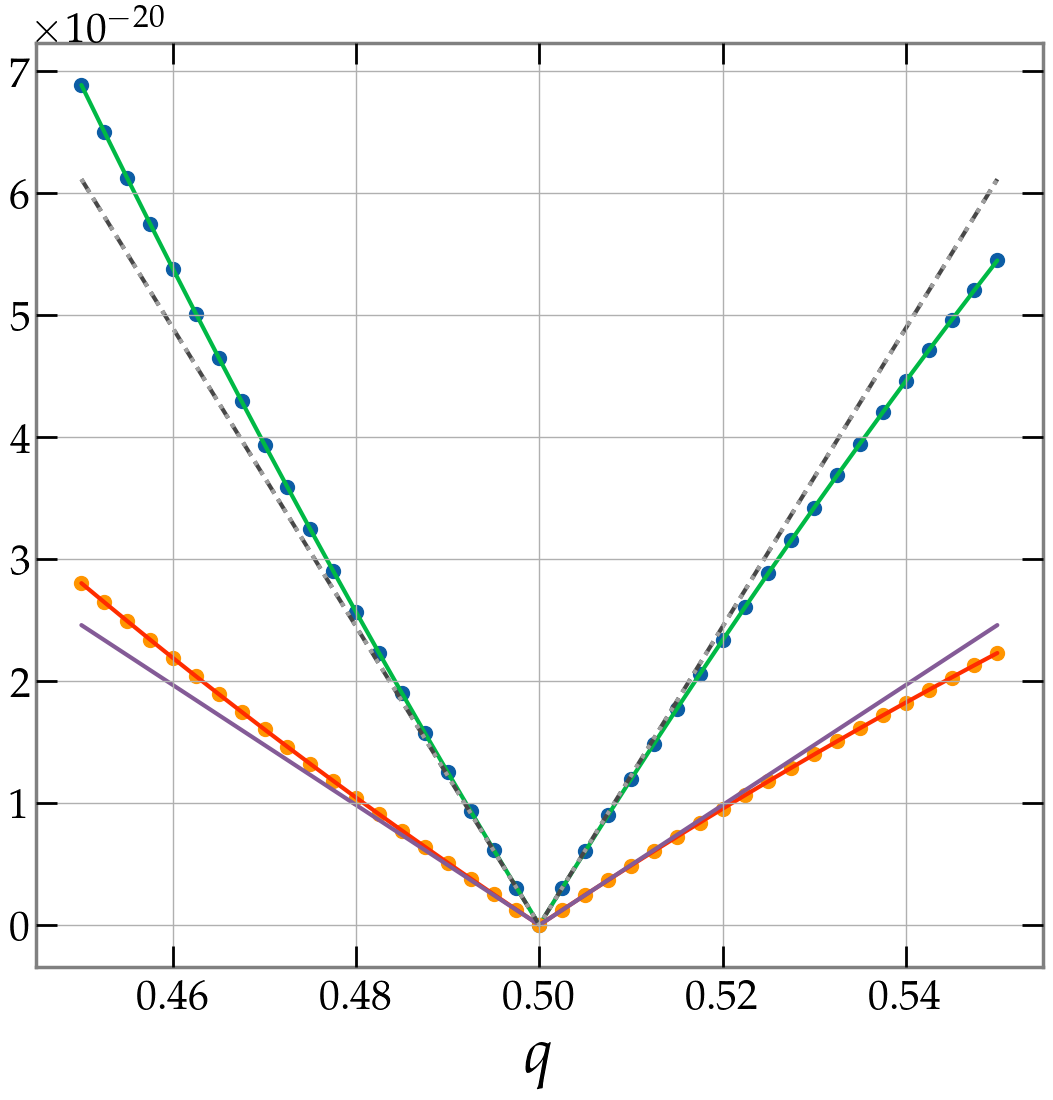

In [14]:
plt.plot(distance_non_opt, '.')
plt.plot(distance_non_opt, '-')

plt.plot(distance_opt, '.')
plt.plot(distance_opt, '-')

plt.plot(approx_distance_opt1)
plt.plot(approx_distance_non_opt, '--')
plt.plot(approx_distance_opt2, ':')


# plt.xlim(0.41, 0.43)
# plt.ylim(0, 6e-19)
# plt.ylim(0, 3e-19)
# plt.ylim(0, 2e-20)

plt.xlabel(latexparams[param_to_vary] if param_to_vary in latexparams else param_to_vary)

plt.show()

Interesting: agreement not so good for spin1z because it evolves very non-linearly (does not seem to be issue with projection, just with linearized approximation in that regime)

**Note**: for the luminosity distance, all lines are on top of each other. This is because this parameter only influences the amplitude, while optimization over time and phase only affects the phase -- this means both parameters are uncorrelated. In other words, projecting orthogonally to time and phase shift does not affect the luminosity distance value, this parameter spans a separate subspace (not sure if this is 100% correct from a pure mathematical standpoint, but idea is true).